# Estadística para Ciencia de los Datos
# Esteban Garcia Solis
# Tarea #1 - Semana #2



In [0]:
import numpy as np;
import matplotlib.pyplot as plt;
from scipy.stats import norm

def printTable(table):
  col_width = max(len(word) for row in table for word in row) + 2  # padding
  for row in table:
      print("".join(word.ljust(col_width) for word in row))
  print("")

## Parte 2

Envíe un notebook de colab con el código correspondiente a la solución de los siguientes ejercicios a través de TEC Digital a más tardar el domingo 15 de septiembre a las 10 PM. No se aceptarán entregas tardías. Se espera que el código pueda ejecutarse con visualizaciones apropiadas, sino no se asignará puntaje.

1. Muestreo de estaturas. Los estudiantes deberán programar dos funciones para crear muestras de $N$ personas (observaciones) con una sola variable aleatoria: estatura. Para efectos prácticos, ambas funciones pueden retornar una simple lista con valores numéricos que representan la estatura en centímetros de diferentes personas. Para ambas funciones deberán mostrarse ejemplos de creación de muestras con al menos 100 observaciones y mostrarlas en un histograma. La cantidad de cubetas deberá limitarse a un máximo de 9. Las funciones a programar serán las siguientes:
 * **Muestreo Uniforme**. Además de recibir la cantidad de observaciones a generar $N$, recibirá la estatura mínima y máxima  por parámetro. Por ejemplo, si se pide una distribución uniforme entre 150 y 168, las estaturas entre ese rango deberán ser igual de probables de muestrear. (5 puntos)
  * **Muestreo Normal**. Además de recibir la cantidad de observaciones a generar $N$, recibirá la media y desviación estándar por parámetro. De esta forma, la función generará $N$ observaciones provenientes de una distribución Gaussiana con la media y desviación estándar recibidas. (5 puntos)
  
  



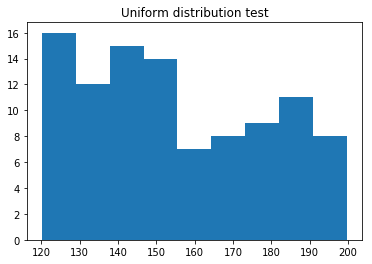

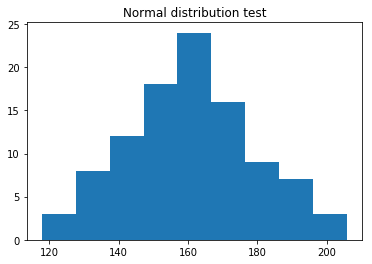

In [151]:
def uniformSample(min, max, n):
  return np.random.uniform(min, max, n)

def normalSample(mu, sigma, n):
  return np.random.normal(mu, sigma, n)

def plotHistogram(data, bins, title):
  if bins > 9:
    print("invalid number of bins: {}".format(bins))
  else:
    plt.hist(data, bins)
    plt.title(title)
    plt.show()

def test(min, max, mu, sigma, n, bins):
  uniform = uniformSample(min, max, n)
  normal = normalSample(mu, sigma, n)
  plotHistogram(uniform, bins, "Uniform distribution test")
  plotHistogram(normal, bins, "Normal distribution test")

test(min=120, max=200, mu=160, sigma=20, n=100, bins=9)


2. **Evaluación de la función de verosimilitud normal**. Deberán proveer una función que reciba una de las **muestras** del punto 1 y evalúe la probabilidad que esa muestra provenga de una distribución normal con parámetros $\mu$ y $\sigma$ (que deberán ser enviados a la función). Deberán mostrar ejemplos obtenidos bajo ambos esquemas de muestreo. Por ejemplo, si se crea una muestra normal centrada en $\mu_1=177$ con $\sigma_1=1$ y evaluamos la verosimilitud para $\mu=176,\sigma=3$ podría darnos una probabilidad alta. En contraposición, al crear una muestra uniforme entre $170$ y $180$ y evaluarla para esos mismos parámetros de verosimilitud, se esperaría que sea menos probable. Todo lo anterior debe reflejarse con ejemplos que muestren el correcto funcionamiento (10 puntos)

In [152]:
def normalProbabilityDensity(h, mu, sigma):
  return np.prod(norm.pdf(h, mu, sigma))

def testLikelihood(min, max, mu, sigma, n, muL, sigmaL, table):
  hNormal  = normalSample(mu, sigma, n)
  hUniform = uniformSample(min, max, n)

  likelihoodNormal  = normalProbabilityDensity(hNormal, muL, sigmaL) 
  likelihoodUniform = normalProbabilityDensity(hUniform, muL, sigmaL)

  table.append(["Normal (mu:{}, sigma:{})".format(mu, sigma), str(n), str(muL), str(sigmaL), str(likelihoodNormal)])
  table.append(["Uniform (min:{}, max:{})".format(min, max), str(n), str(muL), str(sigmaL), str(likelihoodUniform)])

  return table

result = [["Distribution", "n", "mu", "sigma", "Likelihood"]]
result = testLikelihood(min = 170, max = 180, mu = 177, sigma = 1,  n = 10, muL = 176, sigmaL = 3, table = result)
result = testLikelihood(min = 155, max = 175, mu = 160, sigma = 10, n = 10, muL = 160, sigmaL = 10, table = result)

printTable(result)

Distribution                n                           mu                          sigma                       Likelihood                  
Normal (mu:177, sigma:1)    10                          176                         3                           7.024910481796183e-10       
Uniform (min:170, max:180)  10                          176                         3                           5.48439996566021e-11        
Normal (mu:160, sigma:10)   10                          160                         10                          3.733881783788632e-17       
Uniform (min:155, max:175)  10                          160                         10                          4.0533343023996867e-16      



3. ¿Qué problema ocurre con el cálculo de la función de verosimilitud cuando aumentamos la cantidad de observaciones en varios órdenes de magnitud? y ¿Cual sería una forma de solucionar este problema? Programe una función con la posible solución y anote como comentarios las respuestas a las dos preguntas anteriores. De igual forma muestre un ejemplo de como invocar esta función (10 puntos)

>R/ Al incrementar la cantidad de observaciones la multiplicatoria de números pequeños hace que los resultados se aproximen cada vez más a 0. Al punto de obtener un underflow. En la tabla siguiente vemos como con n = 1000 el calculo de la verosimilitud da resultado 0


In [153]:
result = [["Distribution", "n", "mu", "sigma", "Likelihood"]]
result = testLikelihood(min = 170, max = 180, mu = 177, sigma = 1,  n = 10, muL = 176, sigmaL = 3, table = result)
result = testLikelihood(min = 170, max = 180, mu = 177, sigma = 1,  n = 100, muL = 176, sigmaL = 3, table = result)
result = testLikelihood(min = 170, max = 180, mu = 177, sigma = 1,  n = 1000, muL = 176, sigmaL = 3, table = result)
printTable(result)


Distribution                n                           mu                          sigma                       Likelihood                  
Normal (mu:177, sigma:1)    10                          176                         3                           6.896664886716653e-10       
Uniform (min:170, max:180)  10                          176                         3                           1.894805154266882e-11       
Normal (mu:177, sigma:1)    100                         176                         3                           6.446858287122697e-93       
Uniform (min:170, max:180)  100                         176                         3                           1.1234097039416466e-109     
Normal (mu:177, sigma:1)    1000                        176                         3                           0.0                         
Uniform (min:170, max:180)  1000                        176                         3                           0.0                         



>Para solucionar el problema del underflow se puede utilizar la propiedad del logaritmo natural:  
>>$\ln\left(x\cdot y\right)=\ln\left(x\right)+\ln\left(y\right)$

>Asi modificamos la función normalProbabilityDensity para corregir el problema, en la tabla mostrada abajo podemos ver que ya no hay underflow y aún logramos tener una noción de que probabilidad es más alta en comparación con las demás.

In [154]:
def normalProbabilityDensityLn(h, mu, sigma):
  return np.sum(np.log(norm.pdf(h, mu, sigma)))

def testLikelihoodLn(min, max, mu, sigma, n, muL, sigmaL, table):
  hNormal  = normalSample(mu, sigma, n)
  hUniform = uniformSample(min, max, n)

  likelihoodNormal  = normalProbabilityDensityLn(hNormal, muL, sigmaL)
  likelihoodUniform = normalProbabilityDensityLn(hUniform, muL, sigmaL)

  table.append(["Normal (mu:{}, sigma:{})".format(mu, sigma), str(n), str(muL), str(sigmaL), str(likelihoodNormal)])
  table.append(["Uniform (min:{}, max:{})".format(min, max),  str(n), str(muL), str(sigmaL), str(likelihoodUniform)])

  return table

result = [["Distribution", "n", "mu", "sigma", "Ln(Likelihood)"]]
result = testLikelihoodLn(min = 170, max = 180, mu = 177, sigma = 1,  n = 10, muL = 176, sigmaL = 3, table = result)
result = testLikelihoodLn(min = 170, max = 180, mu = 177, sigma = 1,  n = 100, muL = 176, sigmaL = 3, table = result)
result = testLikelihoodLn(min = 170, max = 180, mu = 177, sigma = 1,  n = 1000, muL = 176, sigmaL = 3, table = result)

printTable(result)

Distribution                n                           mu                          sigma                       Ln(Likelihood)              
Normal (mu:177, sigma:1)    10                          176                         3                           -20.81688072521609          
Uniform (min:170, max:180)  10                          176                         3                           -26.41555530753203          
Normal (mu:177, sigma:1)    100                         176                         3                           -212.63911350636337         
Uniform (min:170, max:180)  100                         176                         3                           -246.23229906256267         
Normal (mu:177, sigma:1)    1000                        176                         3                           -2123.706039537701          
Uniform (min:170, max:180)  1000                        176                         3                           -2489.4664129883367         



4. Implemente una función para determinar los valores óptimos para maximizar la función de verosimilitud normal, según teoría vista en clase. Suponga que la cantidad de observaciones (N) siempre es alta. Igualmente se espera que se provean ejemplos en el código para mostrar el correcto funcionamiento (10 puntos)

>nota: El parámetro ddof permite variar el factor de normalizacion: $\frac{1}{n-ddof}$

In [155]:
def maxLikelihoodEstimation(sample, ddof=0):
  return (np.mean(sample), np.std(sample, ddof=ddof))

hNormal  = normalSample(mu = 160, sigma = 20, n= 50)

print(maxLikelihoodEstimation(hNormal))


(154.18084270177496, 17.83338690387705)


5. Genere 10000 muestras de 50 observaciones cada una  provenientes de una distribución normal con $\mu=170$ y $\sigma=1$. Calcule el valor óptimo de la varianza para maximizar la función de verosimilitud normal de cada muestra (estimador de la varianza sesgado) y luego obtenga el valor esperado de la varianza (promedio sobre las 10000 muestras). Compare este valor esperado con el valor  de varianza usado para generar las muestras ($\sigma^{2}=1$)  . Ejecute varias veces su código y responda ¿El valor esperado de la varianza aproxima de manera correcta la varianza original  de la distribución o es necesario hacer alguna corrección en este caso para el cálculo del valor óptimo de la varianza? Justifique su respuesta en ambos casos y explique cual sería la corrección en caso afirmativo (10 puntos)

In [0]:
def generateNormalSamples(mu, sigma, n, r):
  samples = []
  for i in range(r):
    samples.append(normalSample(mu, sigma, n))
  return samples

def maxLikelihoodEstimations(samples, ddof=0):
  estimations = []
  for i in range(len(samples)):
    estimations.append(maxLikelihoodEstimation(samples[i], ddof))
  return estimations

def testVarianceEstimation(mu, sigma, n, r, ddof, tests):
  table = [["Dist. Var.", "Avg. Var.", "Difference"]]
  for i in range(tests):
    variance = sigma * sigma
    normalSamples = generateNormalSamples(mu=170, sigma=1, n=n, r=r)
    estimations = np.array(maxLikelihoodEstimations(normalSamples, ddof))
    expectedVariance = np.sum(estimations[:,1] * estimations[:,1]) / r
    table.append([str(variance), str(expectedVariance), str(abs(variance - expectedVariance))])
  print("Samples: " + str(r))
  print("Observation per sample: " + str(n))
  print("")
  printTable(table)

>Al usar el estimador de varianza sesgado se puede ver que se aproxima bastante al valor de la varianza ($\sigma^{2}=1$), sin embargo, al reducir la cantidad de observaciones por muestra se ve que la estimación deja de ser tan acertada

In [157]:
""" Using biased estimator """
testVarianceEstimation(170, 1, 50, 10000, 0, 10)

""" Using biased estimator """
testVarianceEstimation(170, 1, 10, 10000, 0, 10)

Samples: 10000
Observation per sample: 50

Dist. Var.            Avg. Var.             Difference            
1                     0.9799138243702031    0.020086175629796865  
1                     0.9841526004210417    0.01584739957895831   
1                     0.9801230007220374    0.019876999277962604  
1                     0.9803967023156772    0.019603297684322785  
1                     0.9816207685556539    0.018379231444346056  
1                     0.9794516330032129    0.020548366996787082  
1                     0.9791951053665429    0.02080489463345714   
1                     0.9834128983799797    0.016587101620020306  
1                     0.9832713653263834    0.016728634673616627  
1                     0.9810270159056274    0.018972984094372647  

Samples: 10000
Observation per sample: 10

Dist. Var.           Avg. Var.            Difference           
1                    0.8984479284809197   0.1015520715190803   
1                    0.9067930442962053   0.0932

>Para solucionar el problema utilizamos el estimador de varianza sesgado y vemos como la Estimación se mantiene incluso al utilizar menos observaciones por muestra:

In [158]:
""" Using non biased estimator """
testVarianceEstimation(170, 1, 50, 10000, 1, 10)

""" Using non biased estimator """
testVarianceEstimation(170, 1, 10, 10000, 1, 10)

Samples: 10000
Observation per sample: 50

Dist. Var.              Avg. Var.               Difference              
1                       1.000903318671411       0.0009033186714109132   
1                       1.0014510568225665      0.001451056822566521    
1                       1.000126421794978       0.0001264217949779045   
1                       1.0007742642953505      0.0007742642953505463   
1                       0.9952215980637613      0.004778401936238685    
1                       0.9981052108511822      0.0018947891488177993   
1                       0.9969156875101493      0.003084312489850749    
1                       1.000370979771648       0.00037097977164801677  
1                       1.002574740169263       0.002574740169263068    
1                       0.997607468502425       0.0023925314975750123   

Samples: 10000
Observation per sample: 10

Dist. Var.             Avg. Var.              Difference             
1                      1.012915500111685